# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data_complete = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = len(mouse_data_complete["Mouse ID"].unique())
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Find duplicates based on both 'Mouse ID' and 'Timepoint'
duplicates = mouse_data_complete[mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Display the duplicate rows
duplicates.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_ids = mouse_data_complete[mouse_data_complete.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
# Get unique Mouse IDs that are duplicated
duplicate_mouse_ids_list = duplicate_mouse_ids['Mouse ID'].unique()

# Filter the complete dataset to get all rows for these duplicate Mouse IDs
all_duplicate_data = mouse_data_complete[mouse_data_complete['Mouse ID'].isin(duplicate_mouse_ids_list)]

# Display the result
all_duplicate_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [25]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# Drop duplicates based only on 'mouse id', keeping the first occurrence
clean_data = mouse_data_complete.drop_duplicates(subset=['Mouse ID'], keep=False)
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
594,b447,Ceftamin,Male,2,30,0,45.0,0
752,d133,Zoniferol,Male,5,30,0,45.0,0
851,f932,Ketapril,Male,15,29,0,45.0,0
938,h428,Ketapril,Female,1,27,0,45.0,0
1163,l872,Placebo,Male,19,30,0,45.0,0
1216,n482,Propriva,Female,4,29,0,45.0,0
1315,o848,Stelasyn,Female,14,27,0,45.0,0
1551,t573,Ceftamin,Female,15,27,0,45.0,0
1583,u153,Ceftamin,Female,11,25,0,45.0,0
1599,v199,Naftisol,Female,17,29,0,45.0,0


In [26]:
# Checking the number of mice in the clean DataFrame.
num_unique_mice = clean_data['Mouse ID'].nunique()
num_unique_mice


12

## Summary Statistics

In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
mean = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).mean()
median = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).median()
var = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).var()
std = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).std()
sem = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).sem()

summary = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":var, 
                           "Tumor Volume Std. Dev.":std, 
                           "Tumor Volume Std. Err.":sem})

summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Ceftamin,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0
Placebo,45.0,45.0,NaN,NaN,NaN
Propriva,45.0,45.0,NaN,NaN,NaN
Stelasyn,45.0,45.0,NaN,NaN,NaN
Zoniferol,45.0,45.0,NaN,NaN,NaN


In [29]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean', 
    median='median', 
    variance='var', 
    std_dev='std',
    SEM=lambda x: x.std() / (x.count() ** 0.5) 
).reset_index()

print(summary_stats)
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std']).reset_index()

print(summary_stats)

  Drug Regimen  mean  median  variance  std_dev  SEM
0     Ceftamin  45.0    45.0       0.0      0.0  0.0
1     Ketapril  45.0    45.0       0.0      0.0  0.0
2     Naftisol  45.0    45.0       0.0      0.0  0.0
3      Placebo  45.0    45.0       NaN      NaN  NaN
4     Propriva  45.0    45.0       NaN      NaN  NaN
5     Stelasyn  45.0    45.0       NaN      NaN  NaN
6    Zoniferol  45.0    45.0       NaN      NaN  NaN
  Drug Regimen  mean  median  var  std
0     Ceftamin  45.0    45.0  0.0  0.0
1     Ketapril  45.0    45.0  0.0  0.0
2     Naftisol  45.0    45.0  0.0  0.0
3      Placebo  45.0    45.0  NaN  NaN
4     Propriva  45.0    45.0  NaN  NaN
5     Stelasyn  45.0    45.0  NaN  NaN
6    Zoniferol  45.0    45.0  NaN  NaN


## Bar and Pie Charts

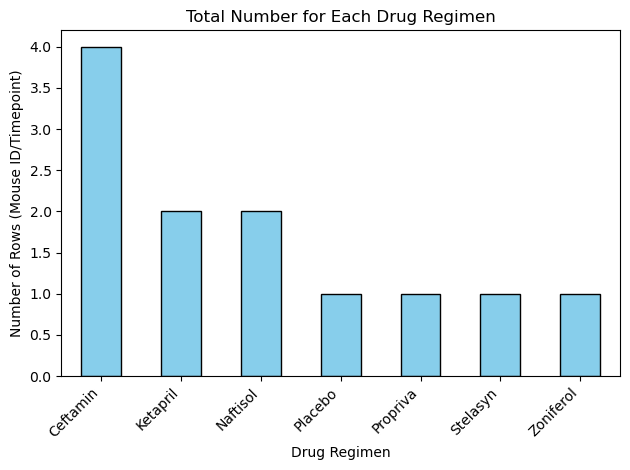

In [30]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = clean_data.groupby('Drug Regimen').size()

# Plot the result 
drug_regimen_counts.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoint)')
plt.title('Total Number for Each Drug Regimen')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

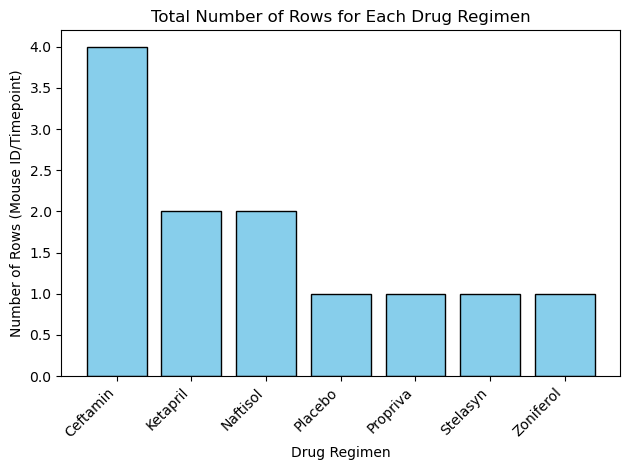

In [31]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = clean_data.groupby('Drug Regimen').size()

# Create a bar plot using pyplot
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows (Mouse ID/Timepoint)')
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xticks(rotation=45, ha='right')  

plt.tight_layout()  
plt.show()

In [33]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
gender_counts = clean_data['Gender'].value_counts()

# Plot a pie chart showing the distribution of unique female and male mice
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90, legend=True)

# Add a title to the pie chart
plt.title('Distribution of Male vs Female Mice')

# Display the pie chart
plt.ylabel('')  # Hide the y-axis label (since it's a pie chart)
plt.show()
# Get the unique mice with their gender
unique_mice_gender = clean_data[['Mouse ID', 'Gender']].drop_duplicates()

print(unique_mice_gender)

# Make the pie chart
gender_counts = unique_mice_gender['Gender'].value_counts()

# Plot a pie chart showing the distribution of male vs female mice
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90, legend=True)

# Add a title to the pie chart
plt.title('Distribution of Unique Male vs Female Mice')

plt.ylabel('')  # Hide the y-axis label (since it's a pie chart)
plt.show()


KeyError: 'Gender'

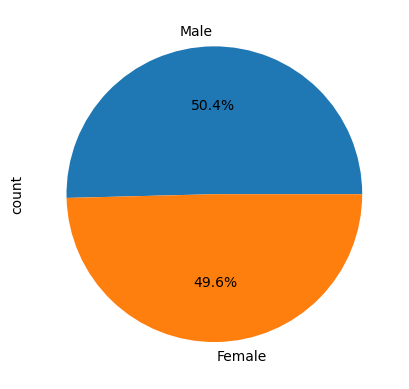

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers.


    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


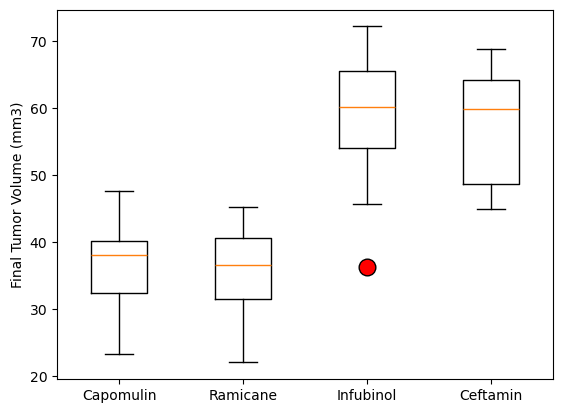

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

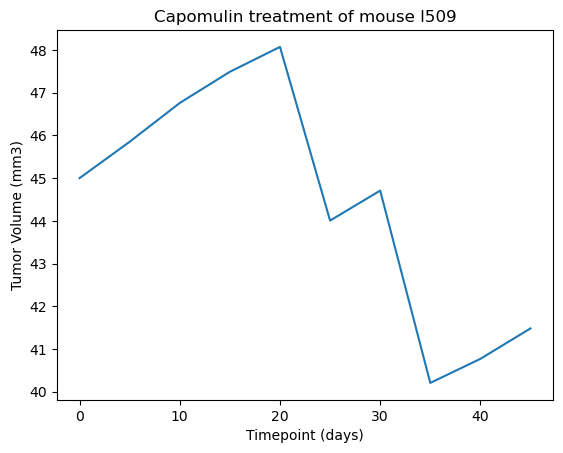

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


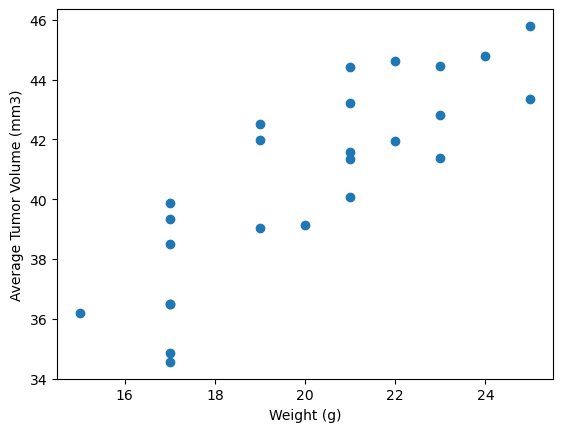

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


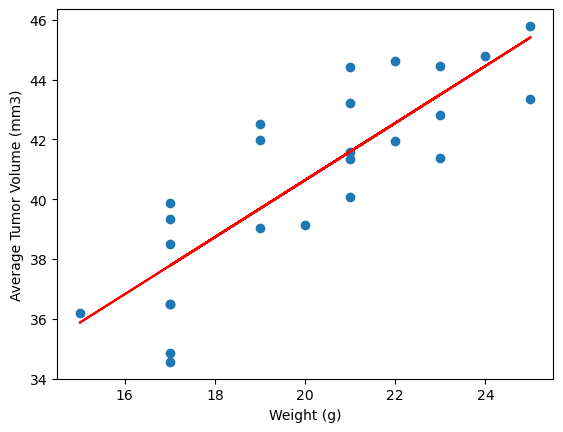

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
